# Q1

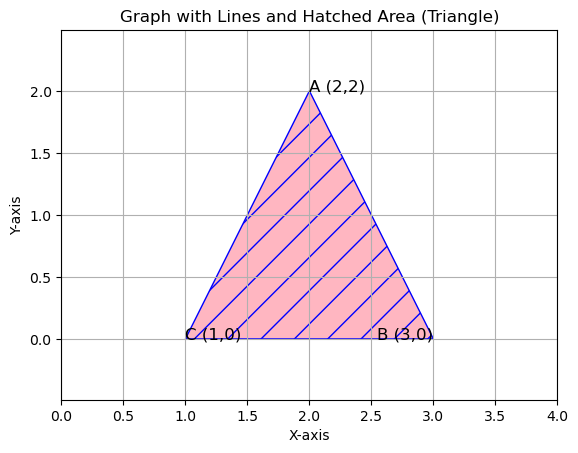

In [1]:
import matplotlib.pyplot as plt
import numpy as np
vertices = np.array([[1, 0], [3, 0], [2, 2]])
triangle = plt.Polygon(vertices, closed=True, fill=True, edgecolor='blue', facecolor='#FFB6C1', hatch='/', label='Area Inside Triangle')
fig, ax = plt.subplots()
ax.add_patch(triangle)
for (x, y), label in zip(vertices, ['C (1,0)', 'B (3,0)', 'A (2,2)']):
    ax.text(x, y, label, fontsize=12, ha='right' if x>2 else 'left')
ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_aspect('equal', adjustable='datalim')
plt.grid(True)
ax.set_title('Graph with Lines and Hatched Area (Triangle)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.show()


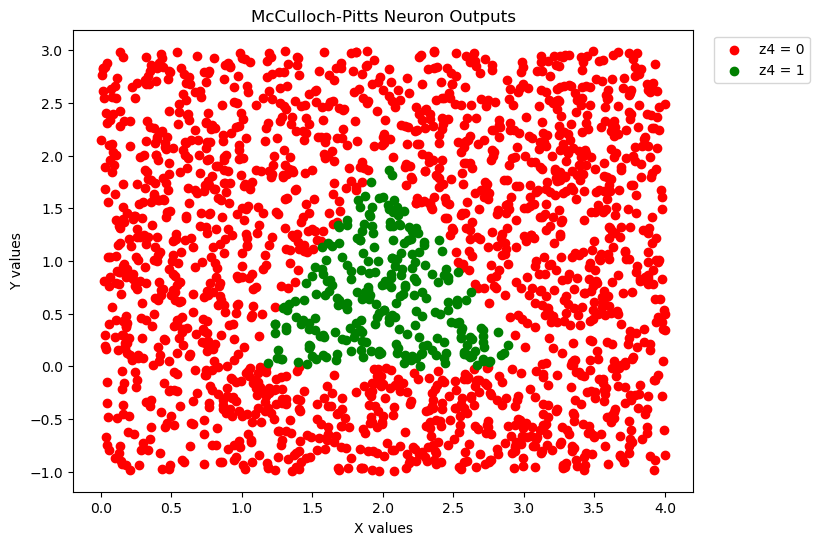

In [2]:
import numpy as np
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

#define model for dataset
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, 1], 6)
  neur2 = McCulloch_Pitts_neuron([0, 1], 0)
  neur3 = McCulloch_Pitts_neuron([-2, 1], -2)
  neur5 = McCulloch_Pitts_neuron([-1, 3, -1], 2.5)
  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur5.model(np.array([z1, z2, z3]))
  return list([z4])

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits
red_points = []
green_points = []
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()


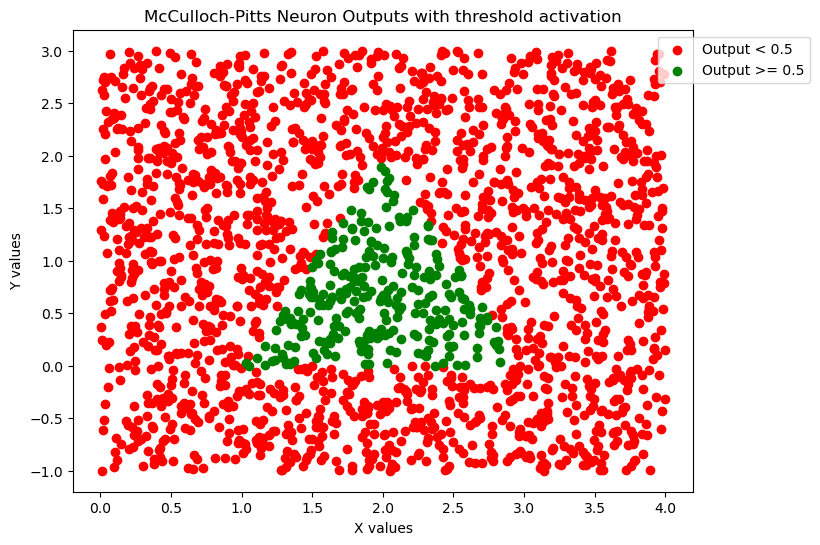

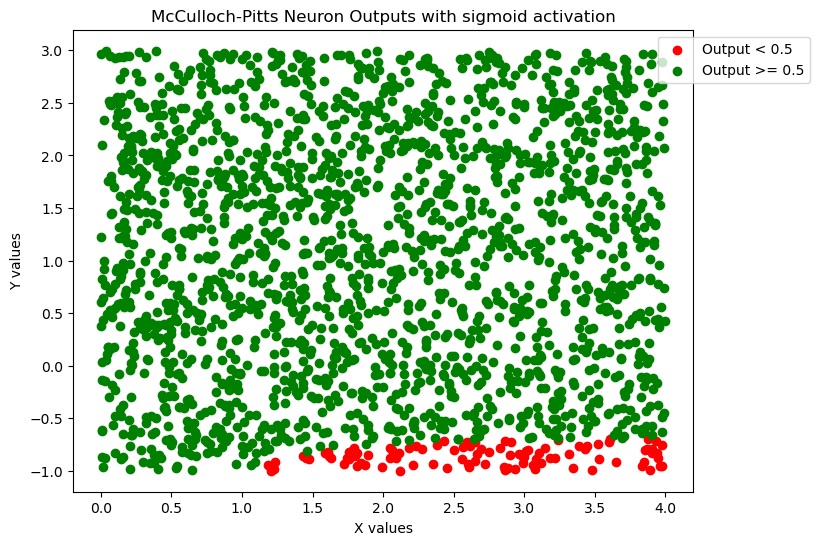

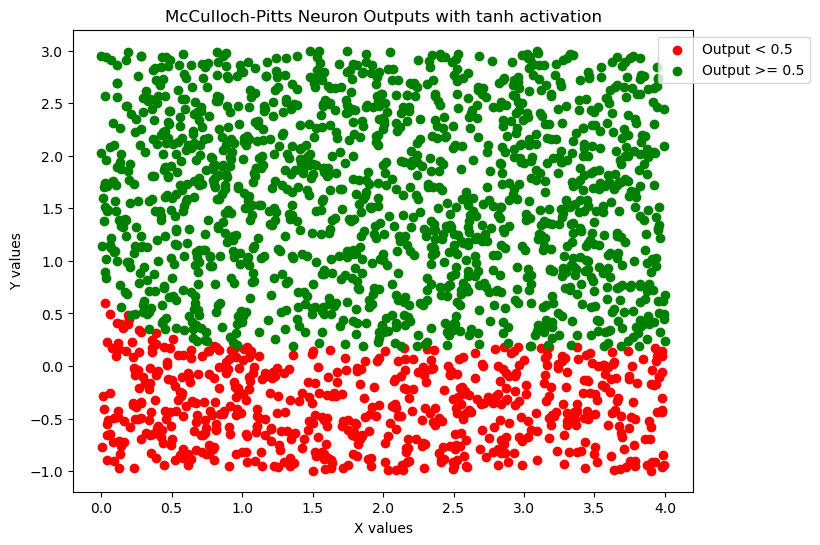

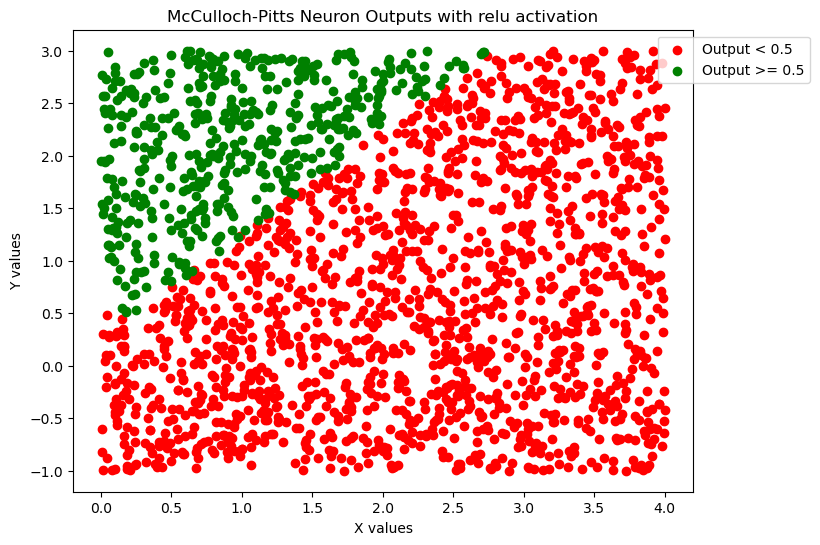

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class McCulloch_Pitts_neuron():
    def __init__(self, weights, activation='threshold', threshold=0):
        self.weights = np.array(weights)
        self.activation = activation
        self.threshold = threshold
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def tanh(self, x):
        return np.tanh(x)
    def relu(self, x):
        return np.maximum(0, x)
    def model(self, x):
        linear_output = self.weights @ x
        if self.activation == 'threshold':
            return 1 if linear_output >= self.threshold else 0
        elif self.activation == 'sigmoid':
            return self.sigmoid(linear_output)
        elif self.activation == 'tanh':
            return self.tanh(linear_output)
        elif self.activation == 'relu':
            return self.relu(linear_output)
        else:
            raise ValueError("Unsupported activation function")
def Area(x, y, activation='threshold'):
    neur1 = McCulloch_Pitts_neuron([2, 1], activation=activation, threshold=6)
    neur2 = McCulloch_Pitts_neuron([0, 1], activation=activation, threshold=0)
    neur3 = McCulloch_Pitts_neuron([-2, 1], activation=activation, threshold=-2)
    neur5 = McCulloch_Pitts_neuron([-1, 3, -1], activation=activation, threshold=2.5)
    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur5.model(np.array([z1, z2, z3]))
    return z4
def classify_and_plot(activation):
    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    red_points = []
    green_points = []

    for i in range(num_points):
        z4_value = Area(x_values[i], y_values[i], activation=activation)
        if z4_value < 0.5:
            red_points.append((x_values[i], y_values[i]))
        else:
            green_points.append((x_values[i], y_values[i]))

    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))
    plt.scatter(red_x, red_y, color='red', label='Output < 0.5')
    plt.scatter(green_x, green_y, color='green', label='Output >= 0.5')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'McCulloch-Pitts Neuron Outputs with {activation} activation')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()

classify_and_plot('threshold')
classify_and_plot('sigmoid')
classify_and_plot('tanh')
classify_and_plot('relu')


# Q2

In [1]:
import scipy.io
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn

! gdown 1U9-FflOKDg1qJFpgN3oFHEXheRI89mVD
!unrar x -Y "MP2_datas.rar" "/content/"

data = scipy.io.loadmat('97.mat')
a = data['X097_DE_time'].flatten()
df1 = pd.DataFrame({'X097_DE_time': a})
print('shape of X097_DE_time',df1.shape)
data = scipy.io.loadmat('105.mat')
a = data['X105_DE_time'].flatten()
df2 = pd.DataFrame({'X105_DE_time': a})
print('shape of X105_DE_time',df2.shape)
data = scipy.io.loadmat('118.mat')
a = data['X118_DE_time'].flatten()
df3 = pd.DataFrame({'X118_DE_time': a})
print('shape of X118_DE_time',df3.shape)
data = scipy.io.loadmat('130.mat')
a = data['X130_DE_time'].flatten()
df4 = pd.DataFrame({'X130_DE_time': a})
print('shape of X130_DE_time',df4.shape)

shape of X097_DE_time (243938, 1)
shape of X105_DE_time (121265, 1)
shape of X118_DE_time (122571, 1)
shape of X130_DE_time (121991, 1)


In [2]:
M = 200
N = 100
data = []
for i in range (1,M):
    data.append(df1['X097_DE_time'].sample(n=N, replace=True, random_state=i).to_list())
df1 = pd.DataFrame(data)
df1['label']=0
print('shape of dataset from class 0',df1.shape)
#######################
data = []
for i in range (1,M):
    data.append(df2['X105_DE_time'].sample(n=N, replace=True, random_state=i).to_list())
df2 = pd.DataFrame(data)
df2['label']=1
print('shape of dataset from class 1',df2.shape)
#######################
data = []
for i in range (1,M):
    data.append(df3['X118_DE_time'].sample(n=N, replace=True, random_state=i).to_list())
df3 = pd.DataFrame(data)
df3['label']=2
print('shape of dataset from class 2',df3.shape)
#######################
data = []
for i in range (1,M):
    data.append(df4['X130_DE_time'].sample(n=N, replace=True, random_state=i).to_list())
df4 = pd.DataFrame(data)
df4['label']=3
print('shape of dataset from class 3',df4.shape)
df = pd.DataFrame()
df = pd.concat([df1,df2,df3,df4], axis = 0)
df = df.drop_duplicates().reset_index(drop=True)
print('shape of all dataset after droping duplicates value',df.shape)

shape of dataset from class 0 (199, 101)
shape of dataset from class 1 (199, 101)
shape of dataset from class 2 (199, 101)
shape of dataset from class 3 (199, 101)
shape of all dataset after droping duplicates value (796, 101)


In [3]:
df['label'].value_counts()

label
0    199
1    199
2    199
3    199
Name: count, dtype: int64

In [4]:
import pandas as pd
import numpy as np

def calculate_peak(data):
    return np.max(data)

def calculate_crest_factor(data):
    peak = np.max(data)
    rms = np.sqrt(np.mean(np.square(data)))
    return peak / rms

def calculate_clearance_factor(data):
    peak = np.max(data)
    mean = np.mean(data)
    return peak / mean

def calculate_square_mean_root(data):
    return np.sqrt(np.mean(np.square(data)))

def calculate_absolute_mean(data):
    return np.mean(np.abs(data))
def calculate_root_mean_square(data):
    return np.sqrt(np.mean(np.square(data)))
def calculate_impact_factor(peak, rms):
    return peak / rms
datas = []
for index, row in df.iterrows(): 
    label = row['label']
    data = row.iloc[:-1]
    dat=[]
    rms = calculate_root_mean_square(data)
    peak = calculate_peak(data)
    dat.append(np.std(data))
    dat.append(calculate_peak(data))
    dat.append(calculate_crest_factor(data))
    dat.append(calculate_clearance_factor(data))
    dat.append(calculate_square_mean_root(data))
    dat.append(np.mean(data))
    dat.append(calculate_absolute_mean(data))
    dat.append(calculate_impact_factor(peak, rms))

    datas.append(dat)
statistics_df = pd.DataFrame(datas)
statistics_df['label'] = df['label']
statistics_df = statistics_df.rename(columns={0:'std',1:'peak',2:'crest',3:'clearance',4:'smr',5:'mean',6:'absolute_mean',7:'impact_factor'})
statistics_df

std      peak     crest   clearance       smr      mean  \
0    0.065845  0.190049  2.678863    7.196461  0.070944  0.026409   
1    0.073314  0.221758  2.907109   10.524752  0.076281  0.021070   
2    0.071386  0.183790  2.482838    9.384320  0.074024  0.019585   
3    0.070100  0.162094  2.299034   21.464088  0.070505  0.007552   
4    0.064244  0.174194  2.376593    4.937031  0.073296  0.035283   
..        ...       ...       ...         ...       ...       ...   
791  0.593558  1.653184  2.773795  -30.671288  0.596001 -0.053900   
792  0.684832  2.627388  3.835119 -140.774587  0.685087 -0.018664   
793  0.568679  1.697447  2.984826 -434.511435  0.568692 -0.003907   
794  0.675883  3.081800  4.548325   64.521340  0.677568  0.047764   
795  0.750590  2.438151  3.247757  175.658280  0.750719  0.013880   

     absolute_mean  impact_factor  label  
0         0.055339       2.678863      0  
1         0.061763       2.907109      0  
2         0.060720       2.482838      0  
3         0.058817       2.299034      0  
4         0.060288       2.376593      0  
..             ...            ...    ...  
791       0.380801       2.773795      3  
792       0.386547       3.835119      3  
793       0.348764       2.984826      3  
794       0.413576       4.548325      3  
795       0.442969       3.247757      3  

[796 rows x 9 columns]

In [25]:
X = statistics_df.drop(columns=['label'])
y = statistics_df['label']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  train_size=0.9, random_state=44, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,
                                                    test_size=0.8, random_state=44, shuffle=True)
print('Valid dataset shape:', X_val.shape)
print('Train dataset shape:', X_train.shape)
print('Test dataset shape:', X_test.shape)

Valid dataset shape: (80, 8)
Train dataset shape: (143, 8)
Test dataset shape: (573, 8)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

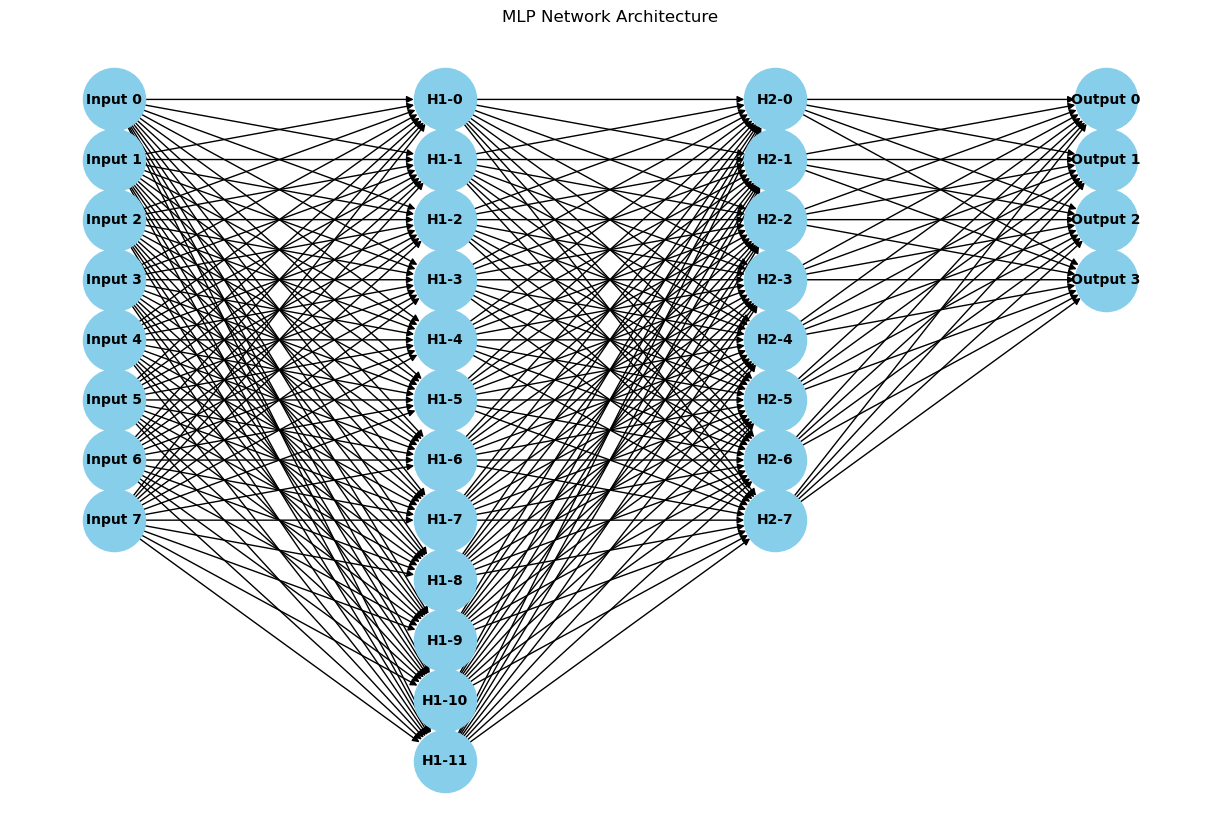

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bce(y, y_hat, epsilon=1e-12):
    y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
    return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def categorical_cross_entropy(y, y_hat, epsilon=1e-12):
    y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
    return -np.mean(np.sum(y * np.log(y_hat), axis=1))

def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat < t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

class MLP:
    def __init__(self, hidden_layer_sizes, hidden_activation='relu',
                 output_size=1, output_activation='sigmoid',
                 n_iter=1000, loss_fn=bce, eta=0.1, random_state=None):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_activation = hidden_activation
        self.output_size = output_size
        self.output_activation = output_activation
        self.n_iter = n_iter
        self.loss_fn = loss_fn
        self.eta = eta
        self.random_state = random_state
        np.random.seed(self.random_state)

    def _init_weights(self):
        self.ws, self.bs = [], []
        self.as_ = [None] * len(self.hidden_layer_sizes)
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i]) * np.sqrt(2. / all_layers[i-1])
            b = np.zeros(all_layers[i])
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y, X_val=None, y_val=None):
        n, self.input_size = X.shape
        self._init_weights()
        train_losses = []
        val_losses = []
        train_accs = []
        val_accs = []
        for _ in range(self.n_iter):
            y_hat = self.predict(X)
            loss = self.loss_fn(y, y_hat)
            self._gradient_descent(X, y, y_hat)
            train_losses.append(loss)
            train_acc = accuracy(y, y_hat)
            train_accs.append(train_acc)
            if X_val is not None and y_val is not None:
                val_loss = self.loss_fn(y_val, self.predict(X_val))
                val_losses.append(val_loss)
                val_acc = accuracy(y_val, self.predict(X_val))
                val_accs.append(val_acc)
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {val_loss:.4f} | Test Acc: {val_acc:.4f}")
            else:
                val_losses.append(None)
                val_accs.append(None)
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f}")
        if X_val is not None and y_val is not None:
            self.plot_history(train_losses, val_losses, train_accs, val_accs)
        else:
            self.plot_history(train_losses, None, train_accs, None)

    def plot_history(self, train_losses, val_losses=None, train_accs=None, val_accs=None):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Training Loss')
        if val_losses is not None:
            val_losses_filtered = [x for x in val_losses if x is not None]
            plt.plot(range(len(val_losses_filtered)), val_losses_filtered, label='Testing Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Testing Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_accs, label='Training Accuracy')
        if val_accs is not None:
            val_accs_filtered = [x for x in val_accs if x is not None]
            plt.plot(range(len(val_accs_filtered)), val_accs_filtered, label='Testing Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Testing Accuracy')
        plt.legend()

        plt.show()

    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)
            b_grad = delta.mean(0)
            self.ws[j] -= self.eta * w_grad
            self.bs[j] -= self.eta * b_grad
            delta = (delta @ self.ws[j].T) * self._activation_derivative(self.hs[j-1], self.hidden_activation)

    def predict(self, X):
        self.hs = []
        self.as_ = []
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i > 0 else X.copy()
            self.hs.append(a @ w + b)
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)
        return y

    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)
        else:
            raise ValueError("Invalid activation function.")
        
import matplotlib.pyplot as plt
import networkx as nx

def draw_mlp(hidden_layer_sizes, input_size, output_size):
    G = nx.DiGraph()
    
    # Adding nodes
    layers = [input_size] + hidden_layer_sizes + [output_size]
    node_id = 0
    pos = {}
    labels = {}
    
    for layer_index, layer_size in enumerate(layers):
        for node_index in range(layer_size):
            node_name = f"Layer {layer_index} Neuron {node_index}"
            G.add_node(node_id, layer=layer_index)
            pos[node_id] = (layer_index, -node_index)
            if layer_index == 0:
                labels[node_id] = f"Input {node_index}"
            elif layer_index == len(layers) - 1:
                labels[node_id] = f"Output {node_index}"
            else:
                labels[node_id] = f"H{layer_index}-{node_index}"
            node_id += 1
    
    # Adding edges
    for layer_index in range(len(layers) - 1):
        current_layer_size = layers[layer_index]
        next_layer_size = layers[layer_index + 1]
        for current_node in range(current_layer_size):
            for next_node in range(next_layer_size):
                current_node_id = sum(layers[:layer_index]) + current_node
                next_node_id = sum(layers[:layer_index+1]) + next_node
                G.add_edge(current_node_id, next_node_id)
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
    plt.title("MLP Network Architecture")
    plt.show()

# Define the parameters of the MLP
hidden_layer_sizes = [12, 8]  # Example: 2 hidden layers with 5 and 4 neurons
input_size = 8  # Number of input features
output_size = 4  # Number of output neurons

draw_mlp(hidden_layer_sizes, input_size, output_size)



In [28]:
from sklearn.preprocessing import OneHotEncoder
y_train = y_train.to_numpy()
y_valid = y_val.to_numpy()
y_test = y_test.to_numpy()
X_valid = X_val
del X_val
encoder = OneHotEncoder()

train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
test_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

Train Loss: 0.9047 | Train Acc: 2.3566 | Test Loss: 1.0099 | Test Acc: 2.4276
Train Loss: 0.9055 | Train Acc: 2.4545 | Test Loss: 1.0136 | Test Acc: 2.4956
Train Loss: 0.9077 | Train Acc: 2.4895 | Test Loss: 1.0180 | Test Acc: 2.5393
Train Loss: 0.9108 | Train Acc: 2.5594 | Test Loss: 1.0230 | Test Acc: 2.5934
Train Loss: 0.9144 | Train Acc: 2.6503 | Test Loss: 1.0280 | Test Acc: 2.6614
Train Loss: 0.9181 | Train Acc: 2.6923 | Test Loss: 1.0331 | Test Acc: 2.6736
Train Loss: 0.9217 | Train Acc: 2.7133 | Test Loss: 1.0380 | Test Acc: 2.6963
Train Loss: 0.9249 | Train Acc: 2.7063 | Test Loss: 1.0426 | Test Acc: 2.7155
Train Loss: 0.9276 | Train Acc: 2.7063 | Test Loss: 1.0465 | Test Acc: 2.7382
Train Loss: 0.9293 | Train Acc: 2.7273 | Test Loss: 1.0496 | Test Acc: 2.7696
Train Loss: 0.9302 | Train Acc: 2.8042 | Test Loss: 1.0520 | Test Acc: 2.8150
Train Loss: 0.9300 | Train Acc: 2.8112 | Test Loss: 1.0534 | Test Acc: 2.8534
Train Loss: 0.9288 | Train Acc: 2.8601 | Test Loss: 1.0540 | Tes

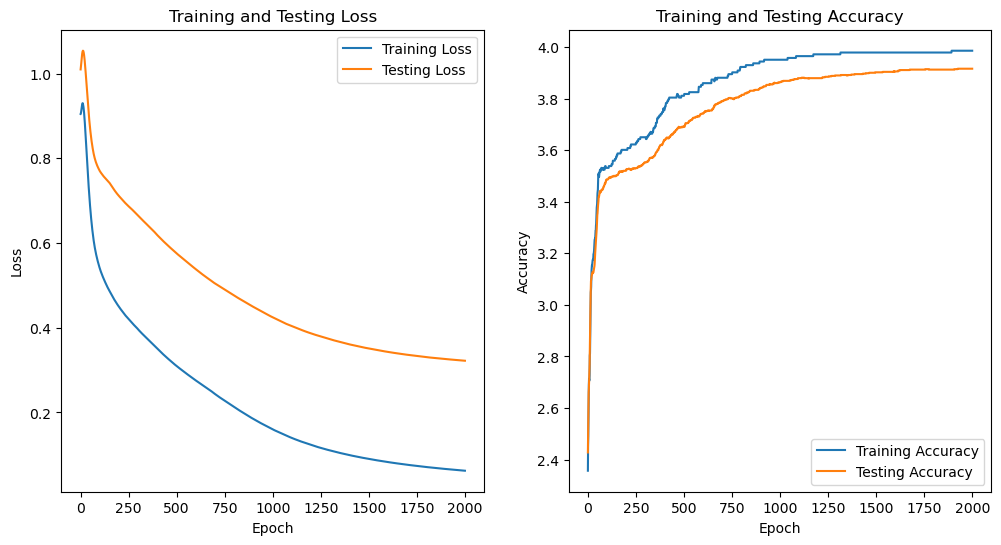

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      0.89      0.91        18
           2       0.95      1.00      0.97        19
           3       0.95      0.95      0.95        21

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



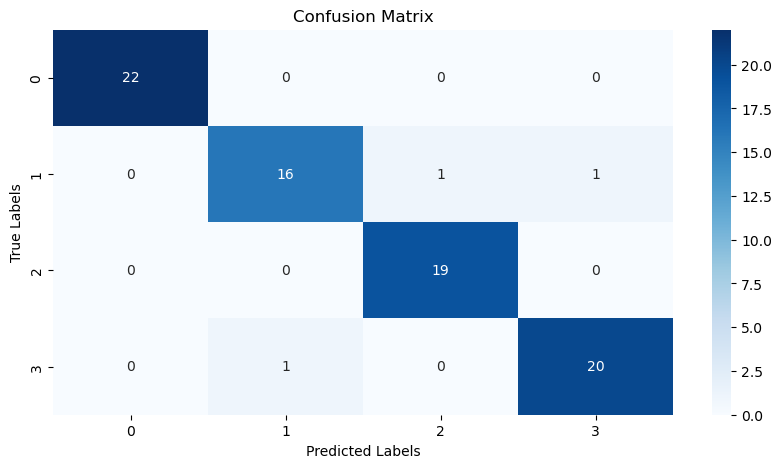

In [74]:
mlp = MLP(hidden_layer_sizes=hidden_layer_sizes, hidden_activation='relu', output_size=output_size, output_activation='sigmoid', n_iter=2000, loss_fn=categorical_cross_entropy, eta=0.06, random_state=44)
mlp.fit(X_train, train_labels_onehot, X_test, validate_labels_onehot)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_hat = mlp.predict(X_valid)
y_hat = np.argmax(y_hat, axis=1)
test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)
import matplotlib.pyplot as plt
import seaborn as sns
cm1 = confusion_matrix(test_labels_onehot, y_hat)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

Train Loss: 0.2756 | Train Acc: 2.3566 | Test Loss: 0.2691 | Test Acc: 2.4276
Train Loss: 0.2654 | Train Acc: 2.4545 | Test Loss: 0.2598 | Test Acc: 2.4956
Train Loss: 0.2559 | Train Acc: 2.4895 | Test Loss: 0.2512 | Test Acc: 2.5393
Train Loss: 0.2471 | Train Acc: 2.5594 | Test Loss: 0.2432 | Test Acc: 2.5934
Train Loss: 0.2389 | Train Acc: 2.6503 | Test Loss: 0.2357 | Test Acc: 2.6614
Train Loss: 0.2313 | Train Acc: 2.6923 | Test Loss: 0.2287 | Test Acc: 2.6736
Train Loss: 0.2242 | Train Acc: 2.7133 | Test Loss: 0.2221 | Test Acc: 2.6963
Train Loss: 0.2174 | Train Acc: 2.7063 | Test Loss: 0.2159 | Test Acc: 2.7155
Train Loss: 0.2110 | Train Acc: 2.7063 | Test Loss: 0.2098 | Test Acc: 2.7382
Train Loss: 0.2048 | Train Acc: 2.7273 | Test Loss: 0.2039 | Test Acc: 2.7696
Train Loss: 0.1987 | Train Acc: 2.8042 | Test Loss: 0.1982 | Test Acc: 2.8150
Train Loss: 0.1927 | Train Acc: 2.8112 | Test Loss: 0.1925 | Test Acc: 2.8534
Train Loss: 0.1869 | Train Acc: 2.8601 | Test Loss: 0.1871 | Tes

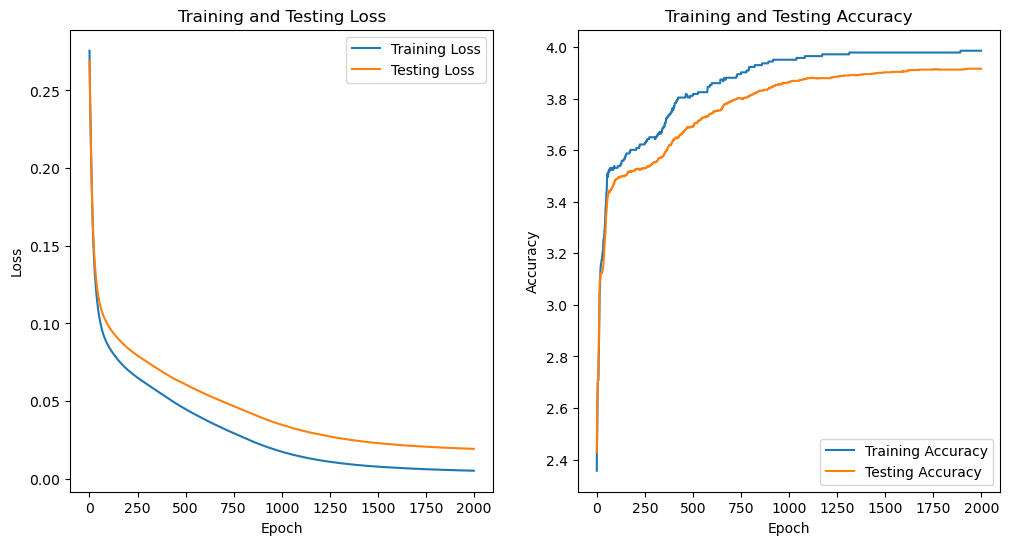

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      0.89      0.91        18
           2       0.95      1.00      0.97        19
           3       0.95      0.95      0.95        21

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



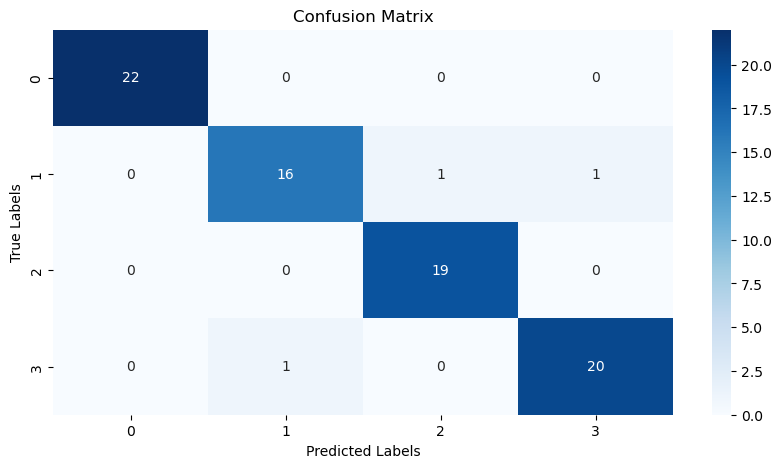

In [75]:
mlp = MLP(hidden_layer_sizes=hidden_layer_sizes, hidden_activation='relu', output_size=output_size, output_activation='sigmoid', n_iter=2000, loss_fn=mse, eta=0.06, random_state=44)

mlp.fit(X_train, train_labels_onehot, X_test, validate_labels_onehot)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_hat = mlp.predict(X_valid)
y_hat = np.argmax(y_hat, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)
import matplotlib.pyplot as plt
import seaborn as sns
cm1 = confusion_matrix(test_labels_onehot, y_hat)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

Train Loss: 0.8008 | Train Acc: 2.3566 | Test Loss: 0.8204 | Test Acc: 2.4276
Train Loss: 0.7624 | Train Acc: 2.4545 | Test Loss: 0.7876 | Test Acc: 2.4956
Train Loss: 0.7302 | Train Acc: 2.4895 | Test Loss: 0.7600 | Test Acc: 2.5393
Train Loss: 0.7032 | Train Acc: 2.5594 | Test Loss: 0.7365 | Test Acc: 2.5934
Train Loss: 0.6803 | Train Acc: 2.6503 | Test Loss: 0.7160 | Test Acc: 2.6614
Train Loss: 0.6604 | Train Acc: 2.6923 | Test Loss: 0.6979 | Test Acc: 2.6736
Train Loss: 0.6427 | Train Acc: 2.7133 | Test Loss: 0.6815 | Test Acc: 2.6963
Train Loss: 0.6264 | Train Acc: 2.7063 | Test Loss: 0.6664 | Test Acc: 2.7155
Train Loss: 0.6115 | Train Acc: 2.7063 | Test Loss: 0.6522 | Test Acc: 2.7382
Train Loss: 0.5972 | Train Acc: 2.7273 | Test Loss: 0.6384 | Test Acc: 2.7696
Train Loss: 0.5833 | Train Acc: 2.8042 | Test Loss: 0.6253 | Test Acc: 2.8150
Train Loss: 0.5699 | Train Acc: 2.8112 | Test Loss: 0.6124 | Test Acc: 2.8534
Train Loss: 0.5567 | Train Acc: 2.8601 | Test Loss: 0.5997 | Tes

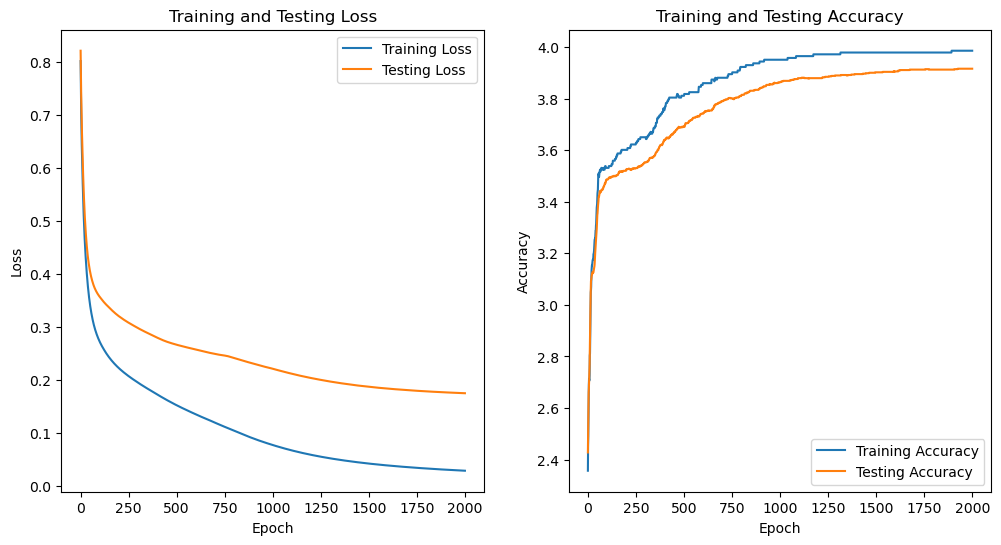

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      0.89      0.91        18
           2       0.95      1.00      0.97        19
           3       0.95      0.95      0.95        21

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



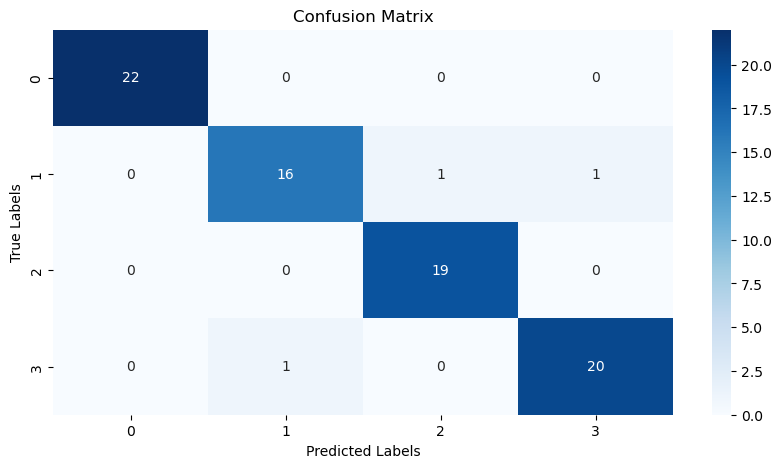

In [76]:
mlp = MLP(hidden_layer_sizes=hidden_layer_sizes, hidden_activation='relu', output_size=output_size, output_activation='sigmoid', n_iter=2000, loss_fn=bce, eta=0.06, random_state=44)

mlp.fit(X_train, train_labels_onehot, X_test, validate_labels_onehot)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_hat = mlp.predict(X_valid)
y_hat = np.argmax(y_hat, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)
import matplotlib.pyplot as plt
import seaborn as sns
cm1 = confusion_matrix(test_labels_onehot, y_hat)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

## Cross validation

Train Loss: 0.7642 | Train Acc: 2.4792 | Test Loss: 0.8150 | Test Acc: 2.2340
Train Loss: 0.7323 | Train Acc: 2.5938 | Test Loss: 0.7838 | Test Acc: 2.3191
Train Loss: 0.7045 | Train Acc: 2.6562 | Test Loss: 0.7571 | Test Acc: 2.3617
Train Loss: 0.6807 | Train Acc: 2.6979 | Test Loss: 0.7341 | Test Acc: 2.3404
Train Loss: 0.6598 | Train Acc: 2.7292 | Test Loss: 0.7143 | Test Acc: 2.4043
Train Loss: 0.6413 | Train Acc: 2.7708 | Test Loss: 0.6969 | Test Acc: 2.4681
Train Loss: 0.6249 | Train Acc: 2.8021 | Test Loss: 0.6818 | Test Acc: 2.4681
Train Loss: 0.6102 | Train Acc: 2.8125 | Test Loss: 0.6677 | Test Acc: 2.4681
Train Loss: 0.5963 | Train Acc: 2.8229 | Test Loss: 0.6548 | Test Acc: 2.5106
Train Loss: 0.5834 | Train Acc: 2.8542 | Test Loss: 0.6433 | Test Acc: 2.5319
Train Loss: 0.5716 | Train Acc: 2.8750 | Test Loss: 0.6313 | Test Acc: 2.5319
Train Loss: 0.5600 | Train Acc: 2.8958 | Test Loss: 0.6198 | Test Acc: 2.5532
Train Loss: 0.5489 | Train Acc: 2.8958 | Test Loss: 0.6082 | Tes

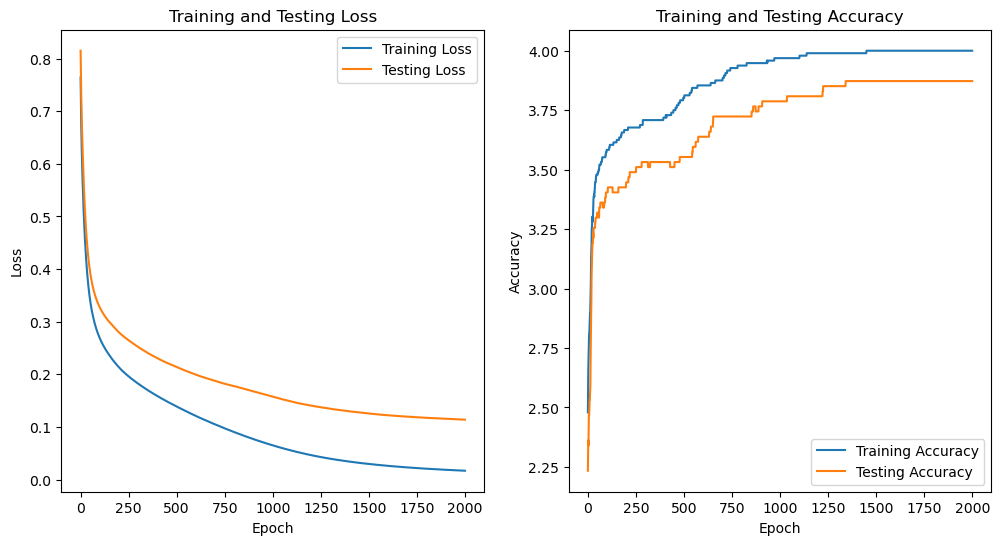

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.89      0.94        18
           2       0.95      1.00      0.97        19
           3       0.95      1.00      0.98        21

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Train Loss: 0.8286 | Train Acc: 2.3021 | Test Loss: 0.7804 | Test Acc: 2.2340
Train Loss: 0.7854 | Train Acc: 2.3958 | Test Loss: 0.7408 | Test Acc: 2.2766
Train Loss: 0.7494 | Train Acc: 2.4479 | Test Loss: 0.7083 | Test Acc: 2.3191
Train Loss: 0.7195 | Train Acc: 2.5417 | Test Loss: 0.6810 | Test Acc: 2.4043
Train Loss: 0.6942 | Train Acc: 2.5938 | Test Loss: 0.6577 | Test Acc: 2.6170
Train Loss: 0.6726 | Train Acc: 2.6667 | Test Loss: 0.6368 | Test Acc: 2.6596
Train Loss: 0.6532 | Train Acc: 2.7083 | Test Loss: 0.6174 | Test Acc: 2.7021
Train Loss: 0.6350 

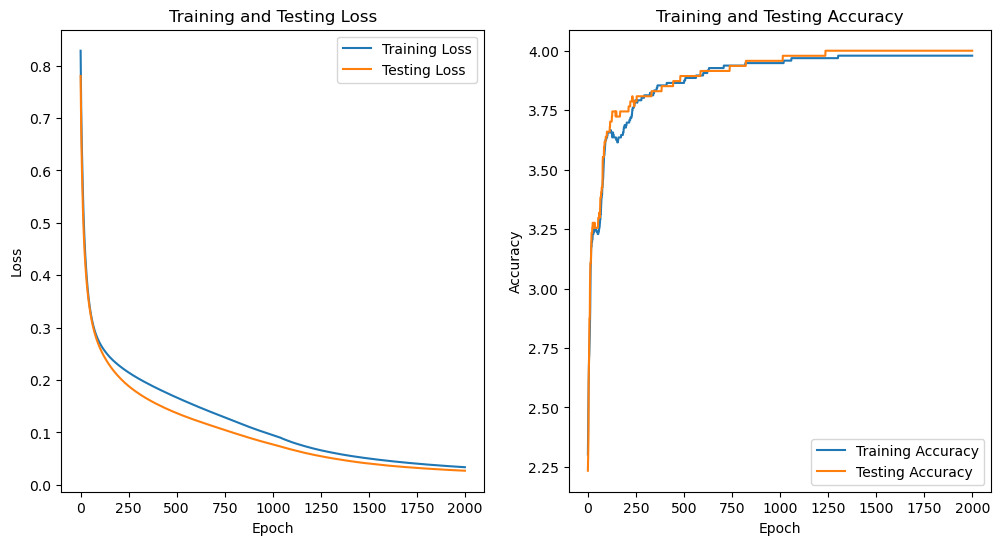

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      0.89      0.91        18
           2       0.95      1.00      0.97        19
           3       0.95      0.95      0.95        21

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

Train Loss: 0.8088 | Train Acc: 2.2812 | Test Loss: 0.9172 | Test Acc: 2.2979
Train Loss: 0.7667 | Train Acc: 2.3958 | Test Loss: 0.8756 | Test Acc: 2.4255
Train Loss: 0.7326 | Train Acc: 2.4375 | Test Loss: 0.8412 | Test Acc: 2.4681
Train Loss: 0.7047 | Train Acc: 2.4792 | Test Loss: 0.8120 | Test Acc: 2.5319
Train Loss: 0.6812 | Train Acc: 2.6042 | Test Loss: 0.7867 | Test Acc: 2.5745
Train Loss: 0.6609 | Train Acc: 2.6458 | Test Loss: 0.7647 | Test Acc: 2.6809
Train Loss: 0.6428 | Train Acc: 2.6458 | Test Loss: 0.7457 | Test Acc: 2.7234
Train Loss: 0.6268 

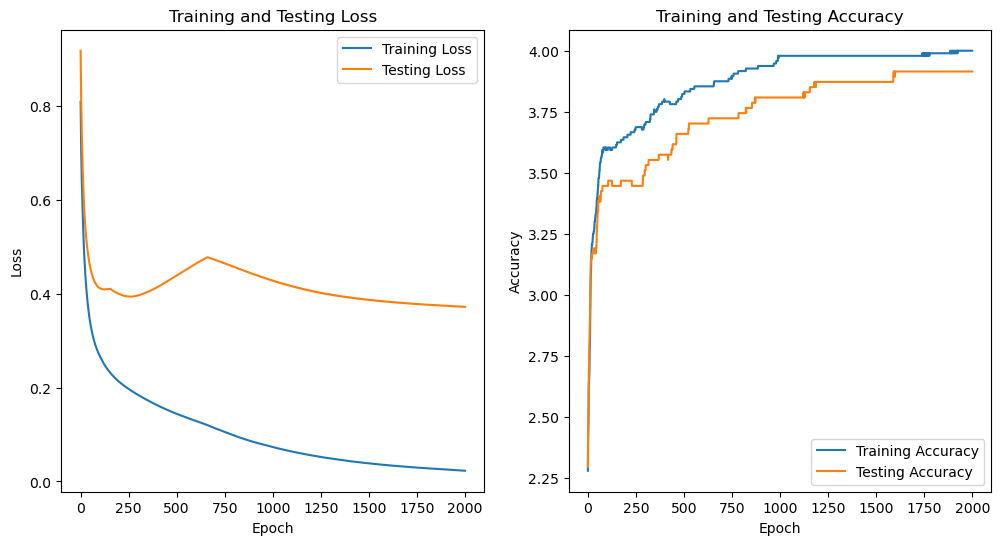

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.89      0.94        18
           2       0.95      1.00      0.97        19
           3       0.95      1.00      0.98        21

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

K-Fold Cross-Validation Scores: [0.975, 0.9625, 0.975]
Mean Accuracy: 0.9708333333333333


In [38]:
from sklearn.metrics import accuracy_score

import numpy as np
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds
k = 3

fold_indices = kfold_indices(X_train, k)
scores = []
for train_indices, test_indices in fold_indices:
    X_train_1, y_train_1 = X_train[train_indices], train_labels_onehot[train_indices]
    X_test_1, y_test_1 = X_test[test_indices], validate_labels_onehot[test_indices]
    mlp = MLP(hidden_layer_sizes=hidden_layer_sizes, hidden_activation='relu', output_size=output_size, output_activation='sigmoid', n_iter=2000, loss_fn=bce, eta=0.06, random_state=44)
    mlp.fit(X_train_1, y_train_1, X_test_1, y_test_1)
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    y_hat = mlp.predict(X_valid)
    y_hat = np.argmax(y_hat, axis=1)
    model_report = classification_report(y_val, y_hat)
    print(model_report)
    fold_score = accuracy_score(y_val, y_hat)
    
    scores.append(fold_score)
mean_accuracy = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)


# Q3

## Q3-1

In [22]:
import pandas as pd

! gdown 1U9-FflOKDg1qJFpgN3oFHEXheRI89mVD
!unrar x -Y "MP2_datas.rar" "/content/"

df = pd.read_csv('drug200.csv')
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [20]:
df = df.sample(frac=1, random_state=44)  
split_idx = int(0.8 * len(df))  
x_train = df[['Age','Sex','BP','Cholesterol','Na_to_K']][:split_idx]
x_test = df[['Age','Sex','BP','Cholesterol','Na_to_K']][split_idx:]
y_train = df['Drug'][:split_idx]
y_test = df['Drug'][split_idx:]
print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [21]:
import numpy as np

def train_test_split(X, y, test_size=0.2, shuffle=False):
    if shuffle:
        indices = np.random.permutation(len(X))
        X = X[indices]
        y = y[indices]
    
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test

In [22]:
import numpy as np
data = df.sample(frac=1, random_state=44).to_numpy()
split_idx = int(0.8 * len(data))
x_train = data[:split_idx, :-1]  # Assuming 'Drug' is the last column
x_test = data[split_idx:, :-1]
y_train = data[:split_idx, -1]
y_test = data[split_idx:, -1]
print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=44)
for train_index, test_index in sss.split(df[['Age','Sex','BP','Cholesterol','Na_to_K']], df['Drug']):
    x_train, x_test = df[['Age','Sex','BP','Cholesterol','Na_to_K']].iloc[train_index], df[['Age','Sex','BP','Cholesterol','Na_to_K']].iloc[test_index]
    y_train, y_test = df['Drug'].iloc[train_index], df['Drug'].iloc[test_index]
print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


X_gender = pd.get_dummies(df['Sex'])
X_BP = pd.get_dummies(df['BP'])
X_chol = pd.get_dummies(df['Cholesterol'])
X_other = df.drop(['Sex','Drug','BP','Cholesterol'],axis=1) 
X = pd.concat([X_gender, X_other, X_BP, X_chol],axis=1).values
y = pd.get_dummies(df['Drug']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, test_size=0.2, shuffle = True)
print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('drug200.csv')
le_drug = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_sex = LabelEncoder()

df['Drug'] = le_drug.fit_transform(df['Drug'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Sex'] = le_sex.fit_transform(df['Sex'])

x_train, x_test, y_train, y_test = train_test_split(df[['Age','Sex','BP','Cholesterol','Na_to_K']], df['Drug'], test_size=0.2, random_state=44, shuffle=True)
print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       0.30      1.00      0.46         3
           3       1.00      0.53      0.70        15
           4       1.00      1.00      1.00        16

    accuracy                           0.82        40
   macro avg       0.86      0.91      0.83        40
weighted avg       0.95      0.82      0.85        40



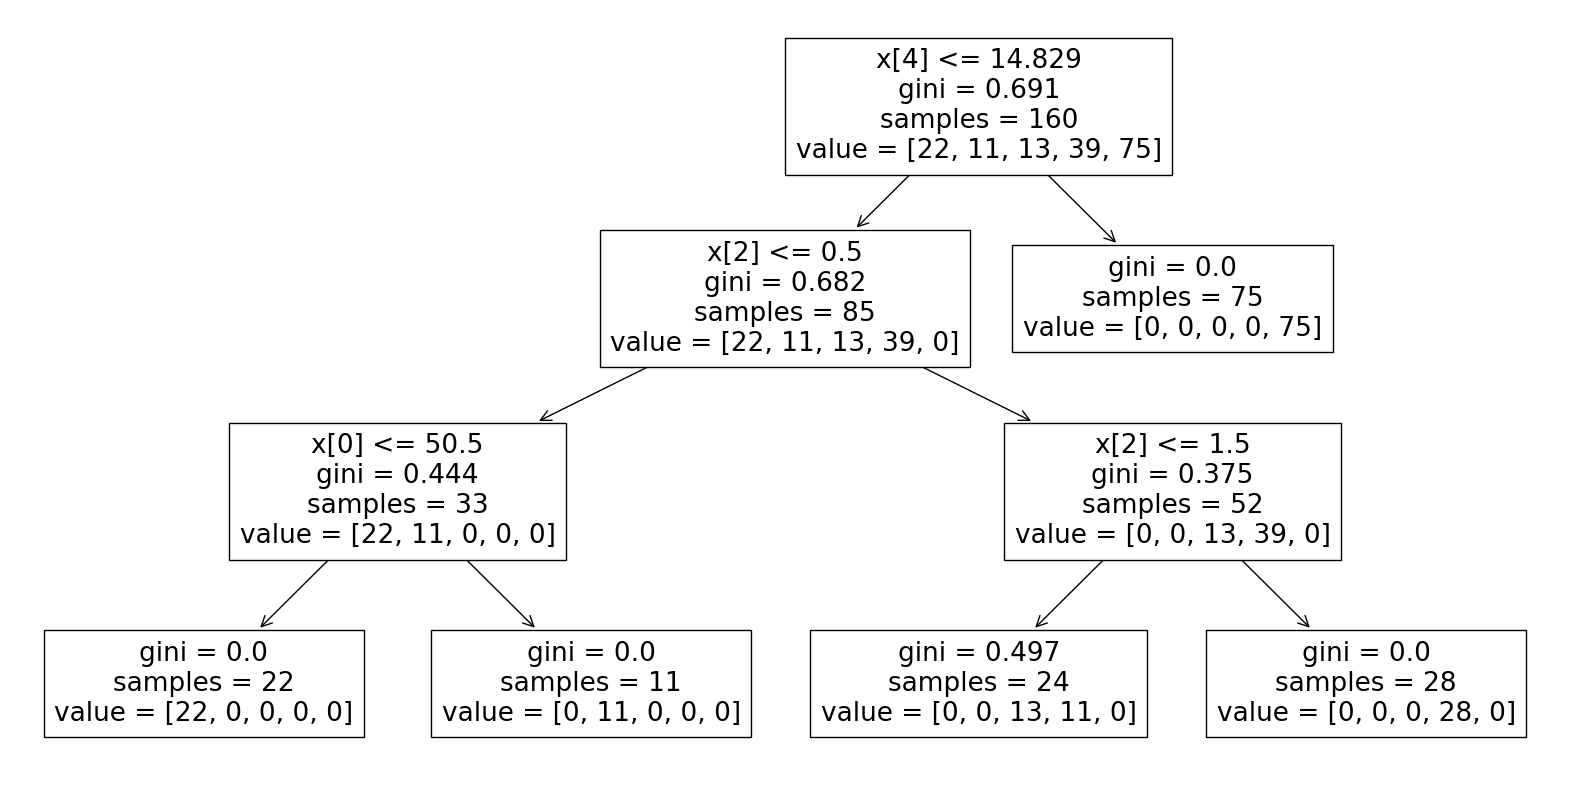

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=False)
plt.show()

In [12]:
!apt-get update; apt-get -y install graphviz
!pip install dtreeviz

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


   ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/91.8 kB ? eta -:--:--
   ------------- -------------------------- 30.7/91.8 kB 325.1 kB/s eta 0:00:01
   ----------------- ---------------------- 41.0/91.8 kB 281.8 kB/s eta 0:00:01
   ----------------- ---------------------- 41.0/91.8 kB 281.8 kB/s eta 0:00:01
   -------------------------- ------------- 61.4/91.8 kB 252.2 kB/s eta 0:00:01
   ---------------------------------------- 91.8/91.8 kB 348.4 kB/s eta 0:00:00


In [73]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import dtreeviz

x_train, x_test, y_train, y_test = train_test_split(
    df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']], 
    df['Drug'], 
    test_size=0.2, 
    random_state=44, 
    shuffle=True
)

# Train a decision tree model
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Ensure the model is fitted before retrieving class names
class_names = df['Drug'].unique().tolist()

viz_model = dtreeviz.model(
    model,
    X_train=x_train, y_train=y_train,
    feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
    target_name='Drug',
    class_names=class_names
)

v = viz_model.view()  # render as SVG into internal object
v.show()
v.save('analysis_dug200.svg')


d:\App\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


Manualy

In [19]:
import numpy as np
import pandas as pd

class Node:
    """Class to represent a node in the decision tree."""
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(data, labels, depth=0, max_depth=3):
    """Builds the decision tree recursively."""
    num_samples, num_features = data.shape
    # If no data, return a leaf
    if num_samples == 0:
        return None
    # If all labels are the same or max depth reached, return a leaf
    if len(set(labels.tolist())) == 1 or depth == max_depth:
        return Node(value=most_common_label(labels))

    # Find the best split
    best_feature, best_threshold = best_split(data, labels)
    
    # If no effective split, return a leaf
    if best_feature is None:
        return Node(value=most_common_label(labels))
    
    # Partition data
    left_idxs = data[:, best_feature] < best_threshold
    right_idxs = data[:, best_feature] >= best_threshold
    
    left = build_tree(data[left_idxs], labels[left_idxs], depth+1, max_depth)
    right = build_tree(data[right_idxs], labels[right_idxs], depth+1, max_depth)
    
    # Return decision node
    return Node(best_feature, best_threshold, left, right)

def most_common_label(labels):
    """Returns the most common label."""
    return max(set(labels.tolist()), key=list(labels).count)

def best_split(data, labels):
    """Finds the best feature and threshold to split on."""
    num_samples, num_features = data.shape
    best_gini = 1.0
    best_feature, best_threshold = None, None

    for feature_index in range(num_features):
        thresholds = set(data[:, feature_index])
        for threshold in thresholds:
            gini = calculate_gini(data, labels, feature_index, threshold)
            if gini < best_gini:
                best_gini, best_feature, best_threshold = gini, feature_index, threshold

    return best_feature, best_threshold

def calculate_gini(data, labels, feature_index, threshold):
    """Calculates the Gini impurity for a split."""
    left_labels = labels[data[:, feature_index] < threshold]
    right_labels = labels[data[:, feature_index] >= threshold]
    left_gini = 1.0 - sum([(left_labels == v).mean()**2 for v in set(left_labels.tolist())])
    right_gini = 1.0 - sum([(right_labels == v).mean()**2 for v in set(right_labels.tolist())])
    # Weighted average
    left_weight = len(left_labels) / len(labels)
    right_weight = len(right_labels) / len(labels)
    return left_gini * left_weight + right_gini * right_weight

def predict(node, sample):
    """Predict a label for a single sample using the decision tree."""
    if node.value is not None:
        return node.value
    if sample[node.feature_index] < node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

def accuracy_score(y_true, y_pred):
    correct = sum(y1 == y2 for y1, y2 in zip(y_true, y_pred))
    return correct / len(y_true)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset and preprocess
df = pd.read_csv('drug200.csv')
le_drug = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_sex = LabelEncoder()

df['Drug'] = le_drug.fit_transform(df['Drug'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Sex'] = le_sex.fit_transform(df['Sex'])

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']], df['Drug'], test_size=0.2, random_state=44, shuffle=True)

# Convert DataFrame to numpy array
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Build tree
tree = build_tree(x_train_np, y_train_np)
# Predict on test set
y_pred = [predict(tree, sample) for sample in x_test_np]

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.825


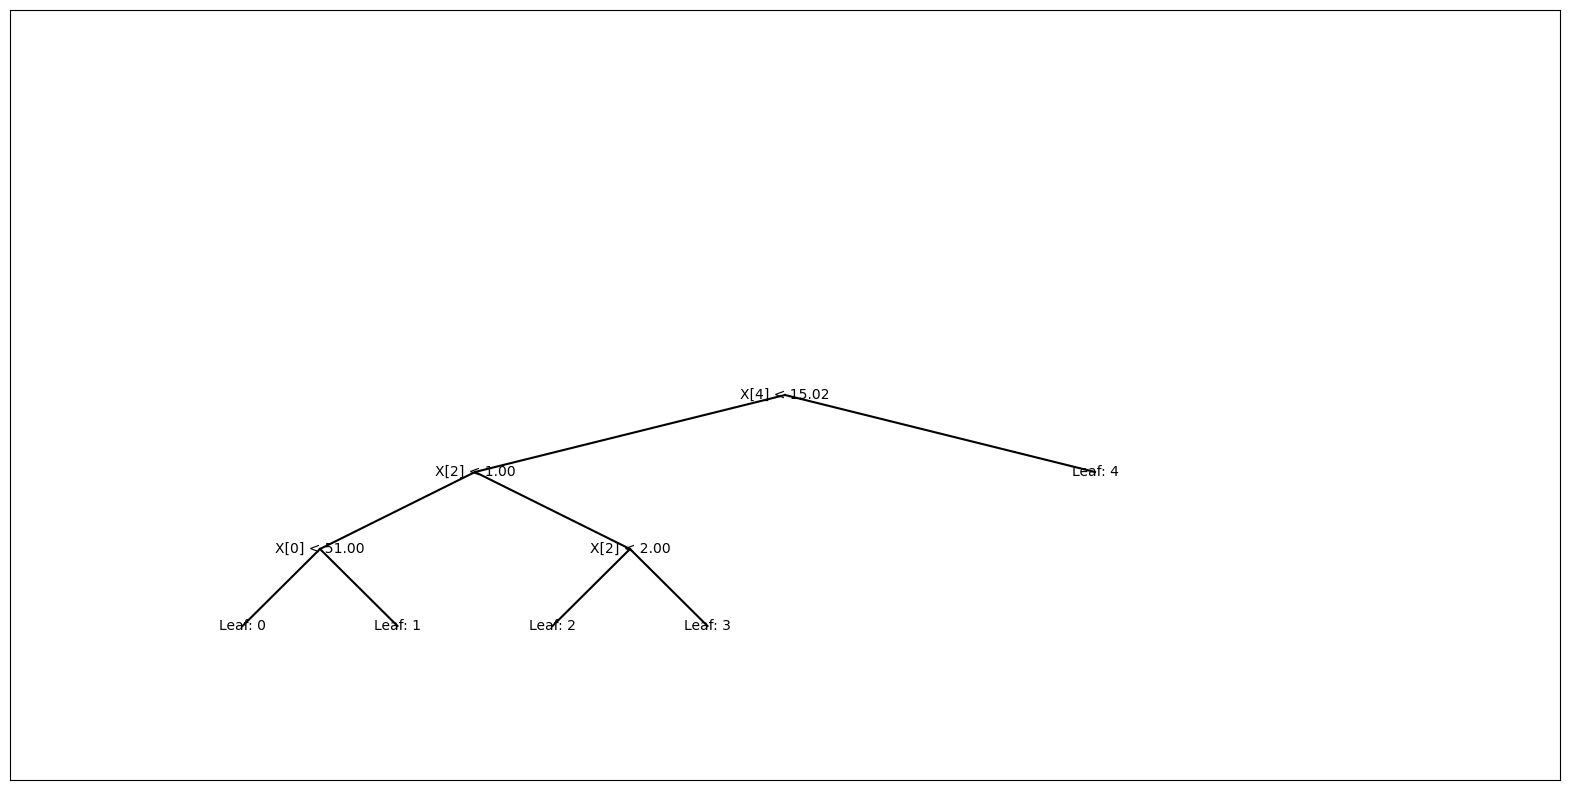

In [10]:
import matplotlib.pyplot as plt

def plot_node(node, x, y, dx, dy, ax):
    """Recursively plot a decision tree node."""
    if node.threshold is not None:  # Check if it is an internal node
        # Plot decision criterion
        ax.text(x, y, f'X[{node.feature_index}] < {node.threshold:.2f}', horizontalalignment='center', verticalalignment='center')
        
        # Draw lines and plot children nodes
        left_x, left_y = x - dx, y - dy
        right_x, right_y = x + dx, y - dy
        ax.plot([x, left_x], [y, left_y], "k-")
        ax.plot([x, right_x], [y, right_y], "k-")
        
        # Recursive call for left and right chi                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ld
        plot_node(node.left, left_x, left_y, dx/2, dy, ax)
        plot_node(node.right, right_x, right_y, dx/2, dy, ax)
    else:
        # Plot leaf value
        ax.text(x, y, f'Leaf: {node.value}', horizontalalignment='center', verticalalignment='center')

def plot_tree(root):
    """Plot the entire tree."""
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plot_node(root, 1, 0, 0.4, 0.2, ax)
    plt.show()

# Assuming `tree` is the root of your decision tree
plot_tree(tree)


## Q3-2

In [15]:
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Precision Score (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall Score (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.825
Hamming Loss: 0.175
Precision Score (macro): 0.86
Recall Score (macro): 0.9066666666666666
F1 Score (macro): 0.831438127090301


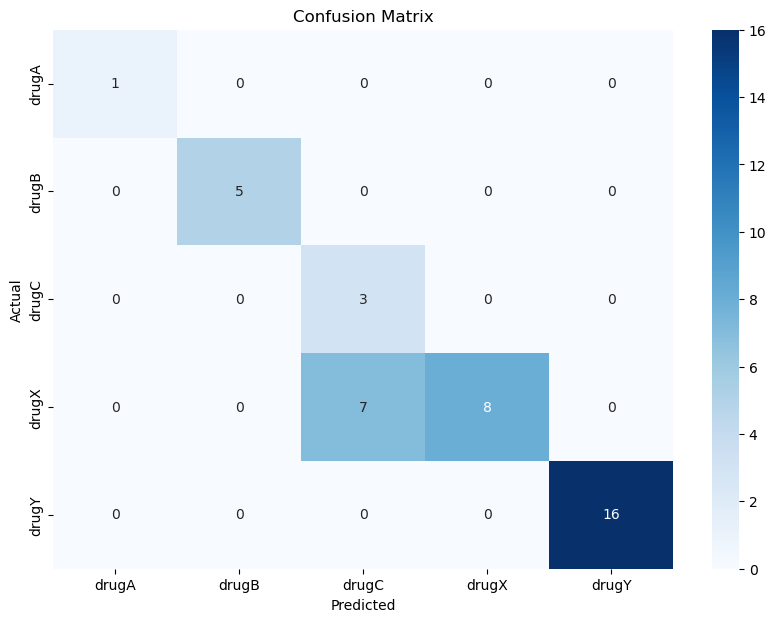

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, make_scorer
import time
max_depth_values = [3, 5, 7, 10]
min_samples_leaf_values = [1, 5, 10, 20]

f1_scorer = make_scorer(f1_score, average='weighted')

results = []

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        
        start_time = time.time()
        
        scores = cross_val_score(model, x_train, y_train, cv=5, scoring=f1_scorer)
        mean_f1_score = np.mean(scores)
        
        end_time = time.time()
        
        runtime = end_time - start_time
        
        results.append({
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'mean_f1_score': mean_f1_score,
            'runtime': runtime
        })

results_df = pd.DataFrame(results)

print(results_df)


    max_depth  min_samples_leaf  mean_f1_score   runtime
0           3                 1       0.927409  0.045877
1           3                 5       0.927409  0.060082
2           3                10       0.927687  0.027932
3           3                20       0.809231  0.024928
4           5                 1       0.987115  0.031109
5           5                 5       0.987115  0.024935
6           5                10       0.933699  0.021935
7           5                20       0.809231  0.023132
8           7                 1       0.987115  0.025392
9           7                 5       0.987115  0.022519
10          7                10       0.933699  0.022526
11          7                20       0.809231  0.022954
12         10                 1       0.987115  0.021942
13         10                 5       0.987115  0.022027
14         10                10       0.933699  0.021939
15         10                20       0.809231  0.020064


## Q3-3

In [58]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators=12, max_depth=10, random_state=44)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [35]:
from sklearn.ensemble import AdaBoostClassifier

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, make_scorer
import time
n_estimators = [3,5, 10, 30, 100]
learning_rate = [ 0.1, 0.05, 0.01]

f1_scorer = make_scorer(f1_score, average='weighted')
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
results = []

for ne in n_estimators:
    for lr in learning_rate:
        model =  AdaBoostClassifier(estimator=weak_learner, n_estimators=ne, learning_rate=lr)
        
        start_time = time.time()
        
        scores = cross_val_score(model, x_train, y_train, cv=5, scoring=f1_scorer)
        mean_f1_score = np.mean(scores)
        
        end_time = time.time()
        
        runtime = end_time - start_time
        
        results.append({
            'n_estimators': ne,
            'learning_rate': lr,
            'mean_f1_score': mean_f1_score,
            'runtime': runtime
        })

results_df = pd.DataFrame(results)

print(results_df)


    n_estimators  learning_rate  mean_f1_score   runtime
0              3           0.10       0.815243  0.066822
1              3           0.05       0.815243  0.051862
2              3           0.01       0.815243  0.046874
3              5           0.10       0.923553  0.060629
4              5           0.05       0.815243  0.063160
5              5           0.01       0.815243  0.059029
6             10           0.10       0.987115  0.096939
7             10           0.05       0.942594  0.095969
8             10           0.01       0.815243  0.115906
9             30           0.10       0.980385  0.286014
10            30           0.05       0.987115  0.337654
11            30           0.01       0.826552  0.247597
12           100           0.10       0.973302  0.821425
13           100           0.05       0.980385  0.835042
14           100           0.01       0.987115  0.771961


In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['Age','Sex','BP','Cholesterol','Na_to_K']], df['Drug'], test_size=0.2, random_state=44)
print(x_train.shape)
print(x_test.shape)

model = AdaBoostClassifier(random_state=42)
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


(160, 5)
(40, 5)
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test Accuracy: 0.275


# Q4

In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

! gdown 1U9-FflOKDg1qJFpgN3oFHEXheRI89mVD
!unrar x -Y "MP2_datas.rar" "/content/"

In [2]:

df = pd.read_csv('heart.csv')

display(df.head())
display(df.describe())


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [3]:
!pip install pandas_profiling
!pip install ydata_profiling
# !pip uninstall numpy
# !pip install numpy==1.24

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


^C


In [5]:
import pandas_profiling as pp
report = pp.ProfileReport(df)

report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df =df.drop_duplicates().reset_index(drop=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['target'], test_size=0.2, random_state=44)
print(X_train.shape)
print(X_test.shape)

(241, 13)
(61, 13)


Confusion Matrix:
[[23  2]
 [ 4 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy: 0.9016393442622951



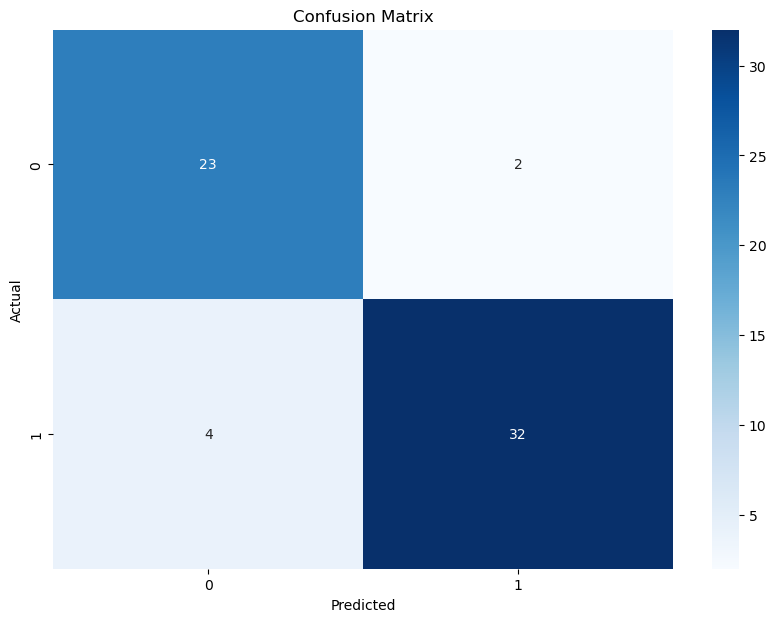

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy}\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [52]:
np.random.seed(44)
random_indices = np.random.choice(len(X_test), 5, replace=False)
X_sample = X_test[random_indices]
y_sample_true = y_test.iloc[random_indices]
y_sample_pred = model.predict(X_sample)

correct_predictions = y_sample_true == y_sample_pred
incorrect_predictions = ~correct_predictions

print("\nAnalysis of the Predictions:")
print(f"Correct Predictions: {np.sum(correct_predictions)}")
print(f"Incorrect Predictions: {np.sum(incorrect_predictions)}")
print('true labels:', y_sample_true.tolist())
print('predict labels:', y_sample_pred.tolist())


Analysis of the Predictions:
Correct Predictions: 5
Incorrect Predictions: 0
true labels: [1, 0, 0, 1, 1]
predict labels: [1, 0, 0, 1, 1]


In [48]:
y_sample_true

95     0
156    1
65     0
35     1
87     1
Name: target, dtype: int64

In [47]:
y_sample_pred

array([0, 1, 0, 1, 1], dtype=int64)